In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

# Version Check for Reproducibility
def check_versions():
    print(f"Python Version: {sys.version}")
    print(f"NumPy Version: {np.__version__}")
    print(f"Pandas Version: {pd.__version__}")
    import scipy
    print(f"SciPy Version: {scipy.__version__}")
    print(f"Seaborn Version: {sns.__version__}")


In [ ]:
def preprocess_data():
    # Define dataset
    data = {
        "Height": [65.8, 71.5, 69.4, 68.2, 67.8, 68.7, 69.8, 70.1, 67.9, 66.8],
        "Weight": [112, 136, 153, 142, 144, 123, 141, 136, 112, 120],
        "Age": [30, 19, 45, 22, 29, 50, 51, 23, 17, 39],
        "Grip Strength": [30, 31, 29, 28, 24, 26, 22, 20, 19, 31],
        "Frailty": ["N", "N", "N", "Y", "Y", "N", "Y", "Y", "N", "N"]
    }

    # Create DataFrame
    df = pd.DataFrame(data)

    # Convert Frailty to binary (0 = No, 1 = Yes)
    df["Frailty"] = df["Frailty"].map({"N": 0, "Y": 1})

    # Ensure directory exists
    os.makedirs("data/processed", exist_ok=True)

    # Save processed data
    df.to_csv("data/processed/frailty_data.csv", index=False)

    return df


In [ ]:
def analyze_data(df):
    # Compute statistics
    mean_grip = np.mean(df["Grip Strength"])
    std_dev = np.std(df["Grip Strength"], ddof=1)  # Ensure sample standard deviation
    correlation, _ = stats.pearsonr(df["Grip Strength"], df["Frailty"])

    print(f"Mean Grip Strength: {mean_grip:.2f}")
    print(f"Standard Deviation: {std_dev:.2f}")
    print(f"Correlation between Grip Strength and Frailty: {correlation:.2f}")

    return mean_grip, std_dev, correlation

In [ ]:
def visualize_data(df):
    # Scatter plot of Grip Strength vs Age
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=df["Age"], y=df["Grip Strength"], hue=df["Frailty"], palette="coolwarm")
    plt.title("Grip Strength vs Age with Frailty Indication")
    plt.xlabel("Age")
    plt.ylabel("Grip Strength")
    plt.legend(title="Frailty", labels=["No", "Yes"])
    plt.show()

    # Box plot of Grip Strength by Frailty
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df["Frailty"], y=df["Grip Strength"], hue=df["Frailty"], palette="coolwarm")
    plt.title("Grip Strength by Frailty")
    plt.xlabel("Frailty (0: No, 1: Yes)")
    plt.ylabel("Grip Strength")
    plt.show()

Python Version: 3.11.11 (main, Dec  4 2024, 08:55:07) [GCC 11.4.0]
NumPy Version: 1.26.4
Pandas Version: 2.2.2
SciPy Version: 1.13.1
Seaborn Version: 0.13.2
Mean Grip Strength: 26.00
Standard Deviation: 4.52
Correlation between Grip Strength and Frailty: -0.48


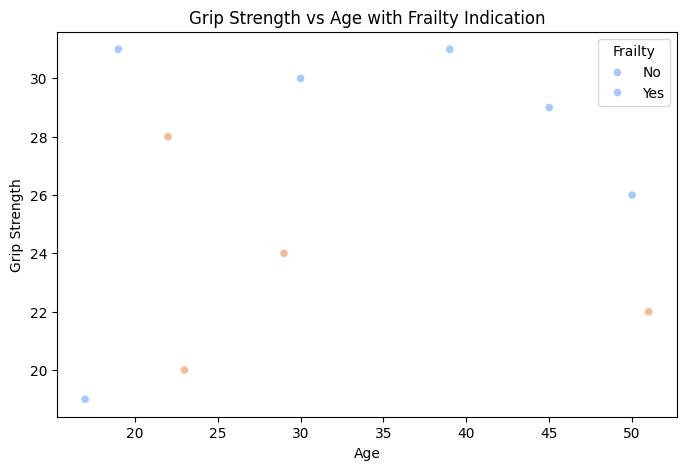

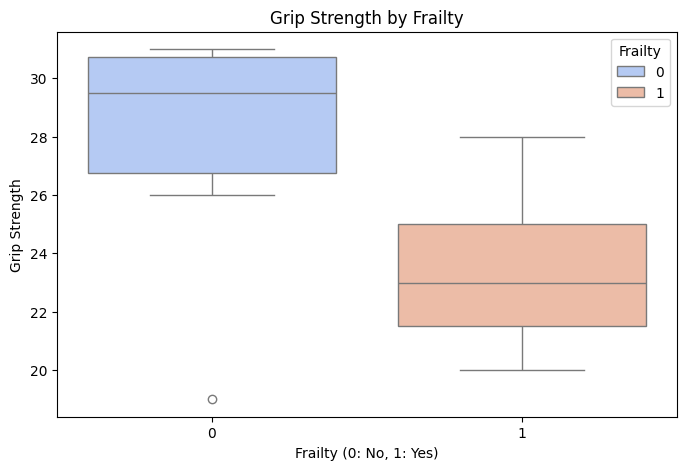

In [ ]:
if __name__ == "__main__":
    check_versions()
    df = preprocess_data()
    analyze_data(df)
    visualize_data(df)
